# Load Modules / Libraries

In [2]:
import pandas as pd
import numpy as np

# Data Load

In [3]:
df = pd.read_csv('/content/drive/MyDrive/01.Defense/housing_price_dataset.csv')
df

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126.0,4.0,1.0,Rural,1969.0,215355.2836
1,2459.0,3.0,2.0,Rural,1980.0,195014.2216
2,1860.0,2.0,1.0,Suburb,1970.0,306891.0121
3,2294.0,NaN,1.0,Urban,NaN,206786.7872
4,2130.0,5.0,2.0,Suburb,2001.0,272436.2391
...,...,...,...,...,...,...
49995,1282.0,5.0,3.0,Rural,1975.0,100080.8659
49996,2854.0,2.0,2.0,Suburb,1988.0,374507.6567
49997,2979.0,5.0,3.0,Suburb,1962.0,384110.5556
49998,2596.0,5.0,2.0,Rural,1984.0,380512.6860


In [4]:
df.shape

(50000, 6)

In [5]:
df.dtypes

SquareFeet      float64
Bedrooms        float64
Bathrooms       float64
Neighborhood     object
YearBuilt       float64
Price           float64
dtype: object

In [6]:
df.isnull().sum()

SquareFeet       2
Bedrooms        20
Bathrooms       11
Neighborhood    13
YearBuilt       20
Price           16
dtype: int64

# Missing value Handling

In [7]:
df['Neighborhood'].value_counts()

Suburb    16713
Rural     16674
Urban     16600
Name: Neighborhood, dtype: int64

In [8]:
df['Neighborhood'] = df['Neighborhood'].fillna('Suburb')

In [9]:
df.SquareFeet.mean()

2006.3601544061762

In [10]:
df['SquareFeet'] = df['SquareFeet'].fillna(df['SquareFeet'].mean())

In [11]:
df.Bedrooms.mean()

3.4986994797919166

In [12]:
df['Bedrooms'] = df['Bedrooms'].fillna(df['Bedrooms'].mean())

In [13]:
df.Bathrooms.mean()

1.9953589789753745

In [14]:
df['Bathrooms'] = df['Bathrooms'].fillna(df['Bathrooms'].mean())

In [15]:
df.YearBuilt.mean()

1985.406262505002

In [16]:
df['YearBuilt'] = df['YearBuilt'].fillna(df['YearBuilt'].mean())

In [17]:
df.Price.mean()

224821.16994617737

In [18]:
df['Price'] = df['Price'].fillna(df['Price'].mean())

In [19]:
df.isnull().sum()

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

In [20]:
df.head(10)

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126.0,4.000000,1.000000,Rural,1969.000000,215355.28360
1,2459.0,3.000000,2.000000,Rural,1980.000000,195014.22160
2,1860.0,2.000000,1.000000,Suburb,1970.000000,306891.01210
3,2294.0,3.498699,1.000000,Urban,1985.406263,206786.78720
4,2130.0,5.000000,2.000000,Suburb,2001.000000,272436.23910
5,2095.0,2.000000,3.000000,Suburb,2020.000000,198208.80390
6,2724.0,2.000000,1.000000,Suburb,1993.000000,343429.31910
7,2044.0,4.000000,1.995359,Rural,1957.000000,184992.32130
8,2638.0,4.000000,3.000000,Urban,1959.000000,377998.58820
9,1121.0,5.000000,2.000000,Urban,1985.406263,95961.92601


# LabelEncoder - Non numerical to numerical

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [22]:
df['Neighborhood']

0         Rural
1         Rural
2        Suburb
3         Urban
4        Suburb
          ...  
49995     Rural
49996    Suburb
49997    Suburb
49998     Rural
49999     Rural
Name: Neighborhood, Length: 50000, dtype: object

In [23]:
#df['SquareFeet'] = le.fit_transform(df['SquareFeet'])

In [24]:
#df['Bedrooms'] = le.fit_transform(df['Bedrooms'])

In [25]:
#df['Bathrooms'] = le.fit_transform(df['Bathrooms'])

In [26]:
df['Neighborhood'] = le.fit_transform(df['Neighborhood'])

In [27]:
#df['YearBuilt'] = le.fit_transform(df['YearBuilt'])

In [28]:
#df['Price'] = le.fit_transform(df['Price'])

In [29]:
df.dtypes

SquareFeet      float64
Bedrooms        float64
Bathrooms       float64
Neighborhood      int64
YearBuilt       float64
Price           float64
dtype: object

In [30]:
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126.0,4.000000,1.0,0,1969.000000,215355.2836
1,2459.0,3.000000,2.0,0,1980.000000,195014.2216
2,1860.0,2.000000,1.0,1,1970.000000,306891.0121
3,2294.0,3.498699,1.0,2,1985.406263,206786.7872
4,2130.0,5.000000,2.0,1,2001.000000,272436.2391


# Visualise Heatmap

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: title={'center': 'Correlation Heatmap'}>

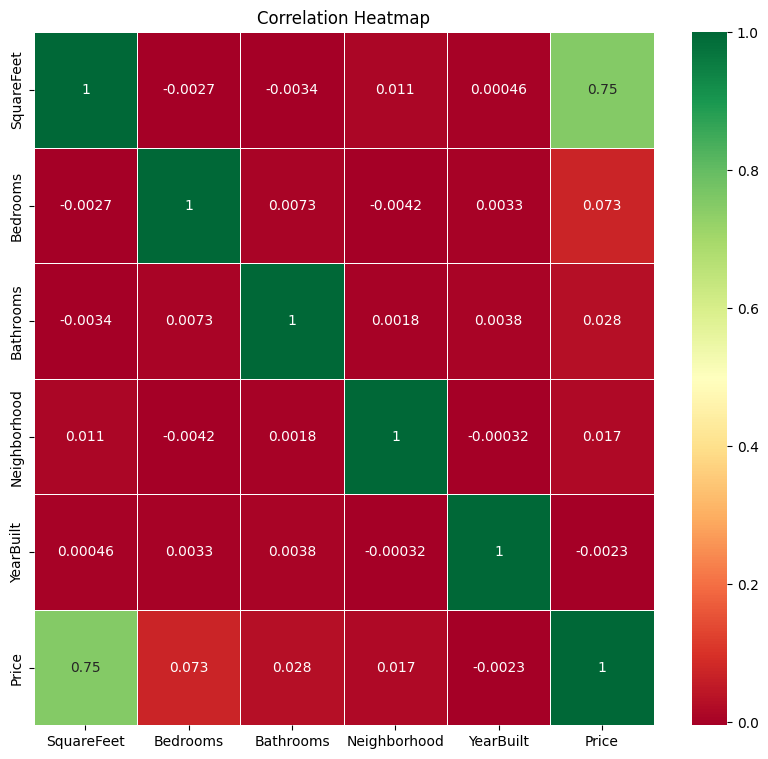

In [32]:
plt.figure(figsize=(10,9))
plt.title("Correlation Heatmap")
sns.heatmap(df.corr(), cmap='RdYlGn', annot = True, linewidths=.5)

# Training Model

In [33]:
x = df.drop('Price', axis=1)
y = df['Price']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [34]:
x

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt
0,2126.0,4.000000,1.0,0,1969.000000
1,2459.0,3.000000,2.0,0,1980.000000
2,1860.0,2.000000,1.0,1,1970.000000
3,2294.0,3.498699,1.0,2,1985.406263
4,2130.0,5.000000,2.0,1,2001.000000
...,...,...,...,...,...
49995,1282.0,5.000000,3.0,0,1975.000000
49996,2854.0,2.000000,2.0,1,1988.000000
49997,2979.0,5.000000,3.0,1,1962.000000
49998,2596.0,5.000000,2.0,0,1984.000000


In [35]:
y

0        215355.2836
1        195014.2216
2        306891.0121
3        206786.7872
4        272436.2391
            ...     
49995    100080.8659
49996    374507.6567
49997    384110.5556
49998    380512.6860
49999    221618.5832
Name: Price, Length: 50000, dtype: float64

# Apply DecisionTreeClassifier

In [36]:
y_train = y_train.to_numpy(dtype="int")
y_test = y_test.to_numpy(dtype="int")

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

# Apply Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg

In [ ]:
# fit the model
lin_reg.fit(x_train, y_train)

In [ ]:
lin_reg.predict([[2226,4,1,0,1969]])

In [ ]:
# y = M1X1 + M2X2+ ...MnXn + c
lin_reg.coef_

In [ ]:
lin_reg.intercept_

In [ ]:
99.51913917*2226 +  5060.26475127*4 +  2863.00127036*1 + 779.79916664*0+ -13.38626996*1969 + 27536.213709099364


In [ ]:
lin_reg.score(x_train, y_train)

In [ ]:
lin_reg.score(x_test, y_test)

In [ ]:
lin_acc_scr = lin_reg.score(x_test, y_test)
lin_acc_scr

# New section